# Load Packages

What we can recall from critisicm regarding this presentation:

- did not take the equal weighted as benchmark
- use total return indices (I think)

In [52]:
#### Import required Packages ####
import numpy as np
import pandas as pd
import seaborn as sb
import datetime as dt
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd

In [53]:
# Seaborn
sb.set_style("ticks")
sb.mpl.rc("figure", figsize=(16,8))
sb.mpl.rc("font", size=14)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# Load Data

In [54]:
# rawdata is direct import from excel

# Import of excel data --> NEEDS TO BE CHANGED TO CORRECT DATA
rawdata = pd.DataFrame(pd.read_excel("1_data/DataMomentumStrategy_TME.xlsx"))
rawdata.columns = ["Trading_day", "Date", "MSCI_EU", "Healthcare", "Finacials", "Consumer_staples","Industrials","Consumer_discretionary","Materials", "Information_technology", "Energy", "Utilities", "Communication_services","Real_estate"]


# Do all the clean up before translating to df and only work with this from now on
df = rawdata
dff = rawdata #create this variable to test the data_cleaner function

In [4]:
df.isnull().values.any() # checking for NAs in our data frame -> needs to return False
#df.describe()

False

In [31]:
# Set date as index -> only run once!
df.set_index("Date", inplace=True)

# Cut Momentum Frame

In [7]:
# Exclude Trading Days column and MSCI_EU Benchmark to have only Momentum columns
prices = df.loc[:,"Healthcare":"Real_estate"]
prices.dtypes

Healthcare                float64
Finacials                 float64
Consumer_staples          float64
Industrials               float64
Consumer_discretionary    float64
Materials                 float64
Information_technology    float64
Energy                    float64
Utilities                 float64
Communication_services    float64
Real_estate               float64
dtype: object

In [8]:
prices

,Healthcare,Finacials,Consumer_staples,Industrials,Consumer_discretionary,Materials,Information_technology,Energy,Utilities,Communication_services,Real_estate
Date,,,,,,,,,,,
2022-10-28,240.09,57.71,273.87,279.43,171.92,296.92,137.20,155.62,122.39,47.21,87.78
2022-10-27,236.37,57.91,272.14,278.26,173.98,299.77,137.69,155.75,122.42,46.64,89.86
2022-10-26,238.68,57.55,272.92,279.21,175.05,302.66,140.13,149.89,121.02,46.48,87.48
2022-10-25,236.23,57.52,274.39,274.85,173.32,298.54,140.29,149.08,120.24,46.32,87.83
2022-10-24,234.17,57.10,271.76,269.43,169.12,293.96,135.04,150.35,117.70,45.56,83.47
...,...,...,...,...,...,...,...,...,...,...,...
1999-01-11,106.55,106.62,100.71,102.31,105.59,101.56,106.15,101.97,104.83,111.17,104.80
1999-01-08,107.03,108.53,102.45,104.32,106.87,103.06,105.05,101.43,105.79,113.28,106.19
1999-01-07,105.35,105.23,100.57,102.29,103.28,101.15,102.51,101.54,104.17,110.62,103.80


In [9]:
# Calculating Monthly returns
mtl_ret = prices.pct_change().resample("M").agg(lambda x: (1+x).prod()-1) # pct_change creates ordinary returns, resample Monthly and aggregating with the (1+x) -1 formula to get monthly ordinary returns
mtl_ret

,Healthcare,Finacials,Consumer_staples,Industrials,Consumer_discretionary,Materials,Information_technology,Energy,Utilities,Communication_services,Real_estate
Date,,,,,,,,,,,
1999-01-31,-0.032788,-0.001298,0.039177,-0.003289,-0.051143,0.029548,-0.072356,0.073422,-0.022196,-1.207245e-01,0.018434
1999-02-28,0.003494,-0.006055,0.001457,-0.042744,-0.019537,-0.031991,0.013730,-0.050937,0.028666,-4.979530e-02,-0.081822
1999-03-31,0.006054,-0.034225,0.015536,-0.032404,0.009296,-0.045381,-0.012077,-0.187686,0.043122,7.867700e-02,-0.010548
1999-04-30,0.059158,-0.057127,-0.037632,-0.080007,-0.082845,-0.141889,-0.069100,-0.085930,0.025500,-4.722652e-02,-0.046914
1999-05-31,0.012249,0.084076,0.008514,0.043887,0.046220,0.050334,0.012256,0.033943,0.002697,-8.429119e-03,-0.040609
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,0.009820,0.084115,0.003961,0.108947,0.063695,0.185921,0.148064,0.123501,0.062803,3.903623e-02,0.199569
2022-07-31,-0.028692,-0.039462,-0.059166,-0.113841,-0.109044,-0.065255,-0.161847,-0.030621,-0.038527,8.881784e-16,-0.113745
2022-08-31,0.083428,0.046644,0.051838,0.104824,0.093576,0.077152,0.136083,-0.037588,0.059253,5.893987e-02,0.171975


In [10]:
past_11 = (mtl_ret+1).rolling(11).apply(np.prod)-1 # accumulate returns over 11 months 
past_11.head(11)

,Healthcare,Finacials,Consumer_staples,Industrials,Consumer_discretionary,Materials,Information_technology,Energy,Utilities,Communication_services,Real_estate
Date,,,,,,,,,,,
1999-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Defining formation date <-  where portfolio gets created
formation = dt.datetime(1999, 12, 31, 0, 0)

In [12]:
# Defining MeasurementDate <- up to last date of month before formation date
end_measurement = formation - MonthEnd(1)
end_measurement

Timestamp('1999-11-30 00:00:00')

In [13]:
# Past 12 Month performance without most recent month <- in this case Jan, Feb, Mar, Apr, Jun, Jul, Sep, Oct, Nov but not December!
ret_12 = past_11.loc[end_measurement]
ret_12 = ret_12.reset_index()
ret_12.rename(columns={ ret_12.columns[1]: "returns" }, inplace = True)
ret_12

,index,returns
0,Healthcare,-0.074931
1,Finacials,-0.097391
2,Consumer_staples,0.087311
3,Industrials,-0.205971
4,Consumer_discretionary,-0.108496
5,Materials,-0.255786
6,Information_technology,-0.501570
7,Energy,-0.322447
8,Utilities,0.065190
9,Communication_services,-0.368567


In [14]:
ret_12 = ret_12.sort_values(["returns"], ascending=False)
ret_12["bucket"] = [2,2,2,2,2,1,0,0,0,0,0] # Make three buckets
ret_12

,index,returns,bucket
2,Consumer_staples,0.087311,2
8,Utilities,0.065190,2
0,Healthcare,-0.074931,2
1,Finacials,-0.097391,2
4,Consumer_discretionary,-0.108496,2
10,Real_estate,-0.117154,1
3,Industrials,-0.205971,0
5,Materials,-0.255786,0
7,Energy,-0.322447,0
9,Communication_services,-0.368567,0


In [15]:
# Create winners and loser list based on bucket
winners = ret_12[ret_12.bucket == 2]
losers = ret_12[ret_12.bucket == 0]
winners

,index,returns,bucket
2,Consumer_staples,0.087311,2
8,Utilities,0.065190,2
0,Healthcare,-0.074931,2
1,Finacials,-0.097391,2
4,Consumer_discretionary,-0.108496,2


In [16]:
# Calculate the winner and loser returns over the last 12 months excluding the most recent month
winnerret = mtl_ret.loc[formation + MonthEnd(1), mtl_ret.columns.isin(winners["index"])]
loserret = mtl_ret.loc[formation + MonthEnd(1), mtl_ret.columns.isin(losers["index"])]

In [17]:
Momentumprofit = winnerret.mean() - loserret.mean()
Momentumprofit

0.048926511474992176

# Functionalising this Methodology

In [63]:
def data_cleaner(pandas_df, index="Date", prices_start='Healthcare', prices_end='Real_estate', resample_freq='M', lookback=11):
    print(pandas_df.isnull().values.any())
    df = pandas_df.set_index(index, inplace=False)
    prices = df.loc[:,prices_start:prices_end]
    mtl_ret = prices.pct_change().resample(resample_freq).agg(lambda x: (1+x).prod()-1)
    past_11 = (mtl_ret+1).rolling(lookback).apply(np.prod)-1
    return prices, mtl_ret, past_11


In [69]:
dfff = dff.set_index("Date", inplace = False)
x = dfff.resample("M")
type(x)

pandas.core.resample.DatetimeIndexResampler

In [72]:
#test out the data_cleaner function

prices, mtl_ret, past_11 = data_cleaner(dff, lookback = 3, resample_freq= 'BM')
print(f'\nprices:\n {prices}, \nmonthly_return:\n {mtl_ret}, \npast_11:\n {past_11}')

False

prices:
             Healthcare  Finacials  Consumer_staples  Industrials  \
Date                                                               
2022-10-28      240.09      57.71            273.87       279.43   
2022-10-27      236.37      57.91            272.14       278.26   
2022-10-26      238.68      57.55            272.92       279.21   
2022-10-25      236.23      57.52            274.39       274.85   
2022-10-24      234.17      57.10            271.76       269.43   
...                ...        ...               ...          ...   
1999-01-11      106.55     106.62            100.71       102.31   
1999-01-08      107.03     108.53            102.45       104.32   
1999-01-07      105.35     105.23            100.57       102.29   
1999-01-06      102.85     103.52            100.74       101.93   
1999-01-05      100.00     100.00            100.00       100.00   

            Consumer_discretionary  Materials  Information_technology  Energy  \
Date              

In [59]:
past_11.head(5)

,Healthcare,Finacials,Consumer_staples,Industrials,Consumer_discretionary,Materials,Information_technology,Energy,Utilities,Communication_services,Real_estate
Date,,,,,,,,,,,
1999-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-03-31,-0.023533,-0.041319,0.056859,-0.076809,-0.061033,-0.048616,-0.070977,-0.172459,0.049208,-0.098774,-0.074759
1999-04-30,0.069294,-0.094911,-0.021257,-0.147868,-0.092404,-0.207037,-0.067716,-0.295310,0.100387,-0.023442,-0.134127
1999-05-31,0.078622,-0.012837,-0.014360,-0.070751,-0.031534,-0.139599,-0.069071,-0.232285,0.072608,0.019072,-0.095262


In [42]:
def momentum(formation, past_11, num_l_s=5):
    end_measurement = formation - MonthEnd(1)
    ret_12 = past_11.loc[end_measurement]
    ret_12 = ret_12.reset_index()
    ret_12.rename(columns={ ret_12.columns[1]: "returns" }, inplace = True)
    ret_12 = ret_12.sort_values(["returns"], ascending=False)
    
    middle = 11-2*num_l_s
    l_s = []
    for i in range(num_l_s):
        l_s.append(2)
    for i in range(middle):
        l_s.append(1)
    for i in range(num_l_s):
        l_s.append(0)
    ret_12["bucket"] = l_s # Make arbitrary number of buckets
    
    winners = ret_12[ret_12.bucket == 2]
    losers = ret_12[ret_12.bucket == 0]
    winnerret = mtl_ret.loc[formation + MonthEnd(1), mtl_ret.columns.isin(winners["index"])]
    loserret = mtl_ret.loc[formation + MonthEnd(1), mtl_ret.columns.isin(losers["index"])]
    Momentumprofit = winnerret.mean() - loserret.mean()
    return Momentumprofit







In [45]:
formation = dt.datetime(1999, 12, 31, 0, 0)
momentum(formation, past_11) # has to be identical with [35]

0.048926511474992176

In [50]:
def benchmarker(pandas_df, profits_list):
    dff = pandas_df.set_index("Date", inplace=False)
    
    benchmark = dff[["MSCI_EU"]]
    benchmark = benchmark.loc["1999-12-31 00:00:00":"2022-09-30 00:00:00"]
    
    bm_mtl_ret = mtl_ret = benchmark.pct_change().resample("M").agg(lambda x: (1+x).prod()-1) # pct_change creates ordinary returns, resample Monthly and aggregating with the (1+x) -1 formula to get monthly ordinary returns
    comparison = pd.DataFrame(bm_mtl_ret)
    comparison["mom_ret"] = profits_list
    comparison.rename(columns={ comparison.columns[0]: "bench_ret" }, inplace = True)
    comparison["bench_indexed"] = comparison["bench_ret"].add(1).cumprod()
    comparison["mom_indexed"] = comparison["mom_ret"].add(1).cumprod()
    print(comparison)
    
    fig, ax = plt.subplots()
    ax.plot(comparison.index,comparison.mom_indexed, label="Momentum", color="red")
    ax.plot(comparison.index,comparison.bench_indexed, label="MSCI EU", color="blue")
    ax.legend(loc="best")
    ax.set_ylabel('Monthly Returns')
    ax.set_title("Momentum long/short 5 sectors monthly rebalancing vs MSCI EU, indexed 31.12.1999")


In [23]:
# Creating loop for every month  starting at formation date -> creates df with all these dates
for i in range(273): # Eig wären es 273 Monate zwischen 31.12.1999 und 31.12.2022 -> stimmt irgendwie ned ganz aber lauft jetzt halt so bis endi august
    print(formation + MonthEnd(i))

#wären es nicht 276 Monate? has mit emene Zeitspannen-rechner usgrechnet --> gahd ets bis endi november 2022
for i in range(276):
    print(formation + MonthEnd(i))


1999-12-31 00:00:00
2000-01-31 00:00:00
2000-02-29 00:00:00
2000-03-31 00:00:00
2000-04-30 00:00:00
2000-05-31 00:00:00
2000-06-30 00:00:00
2000-07-31 00:00:00
2000-08-31 00:00:00
2000-09-30 00:00:00
2000-10-31 00:00:00
2000-11-30 00:00:00
2000-12-31 00:00:00
2001-01-31 00:00:00
2001-02-28 00:00:00
2001-03-31 00:00:00
2001-04-30 00:00:00
2001-05-31 00:00:00
2001-06-30 00:00:00
2001-07-31 00:00:00
2001-08-31 00:00:00
2001-09-30 00:00:00
2001-10-31 00:00:00
2001-11-30 00:00:00
2001-12-31 00:00:00
2002-01-31 00:00:00
2002-02-28 00:00:00
2002-03-31 00:00:00
2002-04-30 00:00:00
2002-05-31 00:00:00
2002-06-30 00:00:00
2002-07-31 00:00:00
2002-08-31 00:00:00
2002-09-30 00:00:00
2002-10-31 00:00:00
2002-11-30 00:00:00
2002-12-31 00:00:00
2003-01-31 00:00:00
2003-02-28 00:00:00
2003-03-31 00:00:00
2003-04-30 00:00:00
2003-05-31 00:00:00
2003-06-30 00:00:00
2003-07-31 00:00:00
2003-08-31 00:00:00
2003-09-30 00:00:00
2003-10-31 00:00:00
2003-11-30 00:00:00
2003-12-31 00:00:00
2004-01-31 00:00:00


In [46]:
# Creating loop for storing the profits and the realized dates of the momentum strategy
profits = []
dates = []

'''
for i in range(273):
    profits.append(momentum(formation + MonthEnd(i)))
    dates.append(formation + MonthEnd(i))
'''

#version 2.0 (da gahds nume bis 274 --> gid en error wenn en monet meh nimmsch)
for i in range(274):
    profits.append(momentum(formation + MonthEnd(i), past_11))
    dates.append(formation + MonthEnd(i))


            bench_ret   mom_ret  bench_indexed  mom_indexed
Date                                                       
1999-12-31   0.005869  0.048927       1.005869     1.048927
2000-01-31   0.028795  0.034299       1.034832     1.084904
2000-02-29  -0.059753 -0.050722       0.972999     1.029876
2000-03-31   0.000801 -0.053484       0.973778     0.974794
2000-04-30  -0.019497 -0.029499       0.954792     0.946039
...               ...       ...            ...          ...
2022-05-31   0.010969  0.073054       0.910819     2.686514
2022-06-30   0.074210 -0.078910       0.978410     2.474522
2022-07-31  -0.068321  0.073548       0.911564     2.656519
2022-08-31   0.071371  0.010519       0.976624     2.684463
2022-09-30   0.049448 -0.017983       1.024916     2.636188

[274 rows x 4 columns]


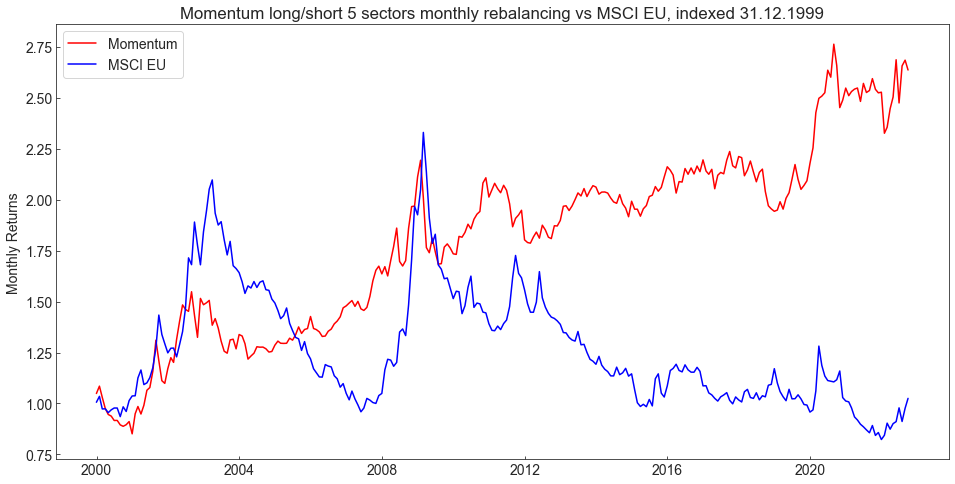

In [51]:
benchmarker(df, profits)

In [25]:
mom = pd.DataFrame({"Dates": dates,"Profits": profits})
mom

,Dates,Profits
0,1999-12-31,0.048927
1,2000-01-31,0.034299
2,2000-02-29,-0.050722
3,2000-03-31,-0.053484
4,2000-04-30,-0.029499
...,...,...
269,2022-05-31,0.073054
270,2022-06-30,-0.078910
271,2022-07-31,0.073548
272,2022-08-31,0.010519


# Benchmarking

In [32]:
benchmark = df[["MSCI_EU"]]
benchmark = benchmark.loc["1999-12-31 00:00:00":"2022-09-30 00:00:00"]
benchmark

,MSCI_EU
Date,
2022-09-30,130.44
2022-09-29,128.90
2022-09-28,131.03
2022-09-27,130.59
2022-09-26,130.68
...,...
2000-01-06,123.95
2000-01-05,124.55
2000-01-04,127.72


In [33]:
bm_mtl_ret = mtl_ret = benchmark.pct_change().resample("M").agg(lambda x: (1+x).prod()-1) # pct_change creates ordinary returns, resample Monthly and aggregating with the (1+x) -1 formula to get monthly ordinary returns
bm_mtl_ret


,MSCI_EU
Date,
1999-12-31,0.005869
2000-01-31,0.028795
2000-02-29,-0.059753
2000-03-31,0.000801
2000-04-30,-0.019497
...,...
2022-05-31,0.010969
2022-06-30,0.074210
2022-07-31,-0.068321


In [34]:
#compare momentum result vs benchmark
comparison = pd.DataFrame(bm_mtl_ret)
comparison["mom_ret"] = profits
comparison.rename(columns={ comparison.columns[0]: "bench_ret" }, inplace = True)
comparison["bench_indexed"] = comparison["bench_ret"].add(1).cumprod()
comparison["mom_indexed"] = comparison["mom_ret"].add(1).cumprod()
comparison


,bench_ret,mom_ret,bench_indexed,mom_indexed
Date,,,,
1999-12-31,0.005869,0.048927,1.005869,1.048927
2000-01-31,0.028795,0.034299,1.034832,1.084904
2000-02-29,-0.059753,-0.050722,0.972999,1.029876
2000-03-31,0.000801,-0.053484,0.973778,0.974794
2000-04-30,-0.019497,-0.029499,0.954792,0.946039
...,...,...,...,...
2022-05-31,0.010969,0.073054,0.910819,2.686514
2022-06-30,0.074210,-0.078910,0.978410,2.474522
2022-07-31,-0.068321,0.073548,0.911564,2.656519


In [26]:
comparison

,bench_ret,mom_ret,bench_indexed,mom_indexed
Date,,,,
1999-12-31,0.005869,0.048927,1.005869,1.048927
2000-01-31,0.028795,0.034299,1.034832,1.084904
2000-02-29,-0.059753,-0.050722,0.972999,1.029876
2000-03-31,0.000801,-0.053484,0.973778,0.974794
2000-04-30,-0.019497,-0.029499,0.954792,0.946039
...,...,...,...,...
2022-05-31,0.010969,0.073054,0.910819,2.686514
2022-06-30,0.074210,-0.078910,0.978410,2.474522
2022-07-31,-0.068321,0.073548,0.911564,2.656519


# Comparison Plot

Text(0.5, 1.0, 'Momentum long/short 5 sectors monthly rebalancing vs MSCI EU, indexed 31.12.1999')

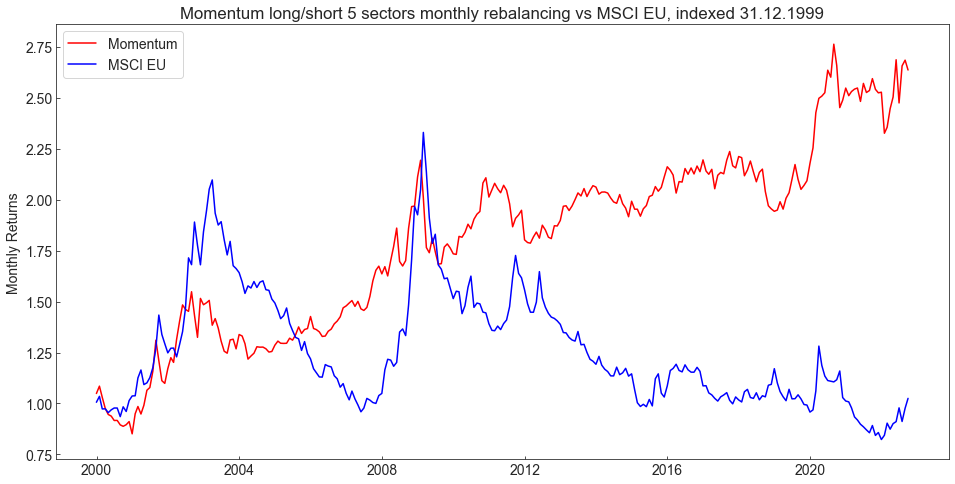

In [35]:
# Plotting
fig, ax = plt.subplots()
ax.plot(comparison.index,comparison.mom_indexed, label="Momentum", color="red")
ax.plot(comparison.index,comparison.bench_indexed, label="MSCI EU", color="blue")
ax.legend(loc="best")
ax.set_ylabel('Monthly Returns')
ax.set_title("Momentum long/short 5 sectors monthly rebalancing vs MSCI EU, indexed 31.12.1999")